## Introduction

Hello, in this python notebook written by Aaron Chien, we will be analyzing housing factors and prices through a dataset given by Kaggle in the House Prices - Advanced Regression Techniques competition. 

Let's load the needed directories first

In [1]:
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as dg

import seaborn as sns 

import matplotlib.pyplot as plt 

import pandas as pd

import numpy as np

import math

import pickle

import dbm

import os

from sklearn.impute import SimpleImputer
import sys

import statistics

## Section 1: Getting Started

We will be working with the training dataset to develop our model 

In [2]:
train = pd.read_csv("/Users/aaron/House/train.csv")

In [3]:
train.rename(columns = {'1stFlrSF' : 'FirFlrSF', '2ndFlrSF' : 'SecFlrSF', '3SsnPorch' : 'SsnPorch'}, inplace = True)

In [4]:
train['Age'] = 2022 - train['YearRemodAdd']

In [5]:
train = train.astype({'GarageYrBlt' : 'float', 'GarageArea' : 'float', 'WoodDeckSF' : 'float', 'OpenPorchSF' : 'float',
                      'EnclosedPorch' : 'float', 'SsnPorch' : 'float', 'ScreenPorch' : 'float', 'YearRemodAdd' : 'float',
                      'MasVnrArea' : 'float', 'BsmtFinSF1' : 'float', 'BsmtFinSF2' : 'float', 'BsmtUnfSF' : 'float',
                      'TotalBsmtSF' : 'float', 'FirFlrSF' : 'float', 'SecFlrSF' : 'float', 'LowQualFinSF' : 'float',
                      'GrLivArea' : 'float', 'OverallQual' : 'float', 'OverallCond' : 'float', 'BsmtFullBath' : 'float',
                      'BsmtHalfBath' : 'float', 'FullBath' : 'float', 'HalfBath' : 'float', 'BedroomAbvGr' : 'float',
                      'KitchenAbvGr' : 'float', 'TotRmsAbvGrd' : 'float', 'Fireplaces' : 'float', 'GarageCars' : 'float',
                      'PoolArea' : 'float', 'MiscVal' : 'float', 'Age' : 'float'
                      })

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FirFlrSF', 'SecFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Given all of these column variables, we can obviously tell there are a lot of factors that go into a house price but we cannot create a model with 79 variables, that'll be inefficient. Instead, if we research about the critical factors of a house, we can see that the neighborhood, location, size and space, age and condition, and any upgrades or updates contribute to a housing price. 

## Section 2: Tests

In the next few sections we will be performing tests and creating regression lines to determine which factors in each category are most significant. Given that we have over 80 variables to test, I have analyzed the dataset and determined that some variables hold less significance base on background information I have. After removing those variables, I have divided the dataset further by having small groups of categories to test.

### Section 2.1: Garage

We will start with testing which garage category is important: GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, and GarageCond

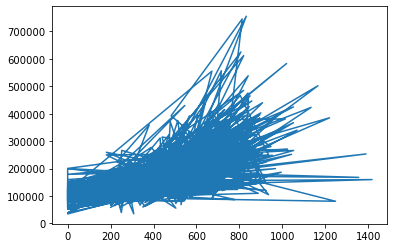

In [7]:
plt.plot(train['GarageArea'], train['SalePrice'])

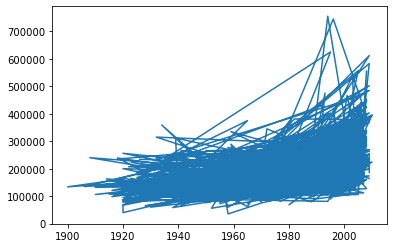

In [8]:
plt.plot(train['GarageYrBlt'], train['SalePrice'])

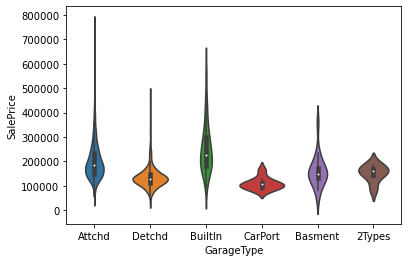

In [9]:
GType = train.groupby('GarageType')[["SalePrice"]].mean().reset_index()

Garage = pd.DataFrame({'GarageType' : [statistics.stdev(GType['SalePrice'])]})

sns.violinplot(x = "GarageType", y = "SalePrice", data = train, split = True)

plt.show()

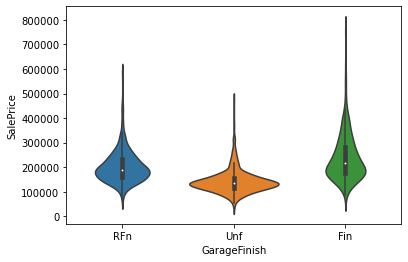

In [10]:
Finish = train.groupby('GarageFinish')[["SalePrice"]].mean().reset_index()

Garage['GarageFinish'] = statistics.stdev(Finish['SalePrice'])

sns.violinplot(x = "GarageFinish", y = "SalePrice", data = train, split = True)

plt.show()

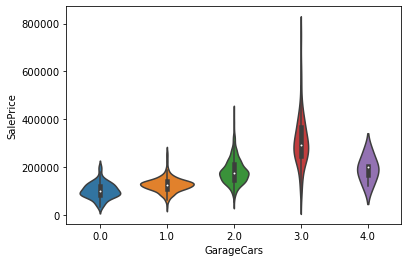

In [11]:
Cars = train.groupby('GarageCars')[["SalePrice"]].mean().reset_index()

Garage['GarageCars'] = statistics.stdev(Cars['SalePrice'])

sns.violinplot(x = "GarageCars", y = "SalePrice", data = train, split = True)

plt.show()

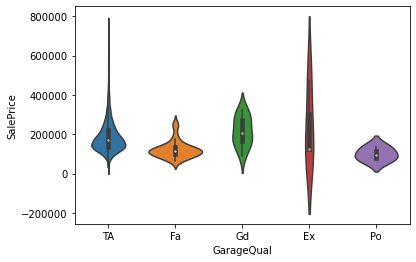

In [12]:
Qual = train.groupby("GarageQual")[['SalePrice']].mean().reset_index()

Garage['GarageQual'] = statistics.stdev(Qual['SalePrice'])

sns.violinplot(x = "GarageQual", y = "SalePrice", data = train, split = True)

plt.show()

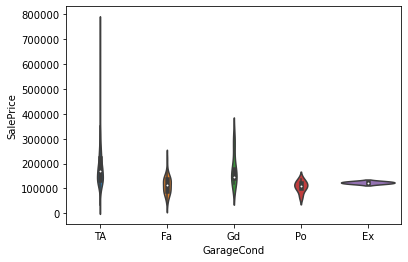

In [13]:
Cond = train.groupby('GarageCond')[['SalePrice']].mean().reset_index()

Garage['GarageCond'] = statistics.stdev(Cond['SalePrice'])

sns.violinplot(x = "GarageCond", y = "SalePrice", data = train, split = True)

plt.show()

In [14]:
Garage = Garage.T
Garage

,0
GarageType,52136.498188
GarageFinish,49355.768007
GarageCars,79829.273233
GarageQual,60034.934857
GarageCond,37859.272465


Now we will test GarageYrBlt and GarageArea with these different categorical variables. 

In [15]:
garage_tst = smf.ols(
        formula = 'np.log(SalePrice) ~ GarageArea + GarageCars*GarageFinish', data = train).fit()

In [16]:
garage_tst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     289.1
Date:                Fri, 26 Aug 2022   Prob (F-statistic):          2.51e-239
Time:                        09:50:37   Log-Likelihood:                -59.046
No. Observations:                1379   AIC:                             132.1
Df Residuals:                    1372   BIC:                             168.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         11.3202      0.055    204.932      0.000      11.212      11.429
GarageFinish[T.RFn]                0.1811      0.073      2.492      0.013       0.039       0.324
GarageFinish[T.Unf]                0.1470      0.063      2.346      0.019       0.024       0.270
GarageArea                         0.0004   6.71e-05      5.877      0.000       0.000       0.001
GarageCars                         0.3488      0.029     11.943      0.000       0.292       0.406
GarageCars:GarageFinish[T.RFn]    -0.1235      0.033     -3.725      0.000      -0.189      -0.058
GarageCars:GarageFinish[T.Unf]    -0.2306      0.030     -7.706      0.000      -0.289      -0.172
==============================================================================
Omnibus:                       95.743   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              375.313
Skew:                          -0.205   Prob(JB):                     3.18e-82
Kurtosis:                       5.523   Cond. No.                     8.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
dg.linear_reset(garage_tst, power = 2)

/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=1.3114843050093923, p-value=0.2521260896346164, df_denom=1>

$log(SalePrice) = 11.3202 + 0.1811(RFn) + 0.1470(Unf) + 0.0004(GarageArea) + 0.34888(GarageCars) + -0.1235 x GarageCars x RFn + -0.2306 x GarageCars X Unf$

### Section 2.2: Location

Now we will examine the subset of location that includes LandContour, LandShape, Neighborhood, Condition1, and Condition2. Since the subset only includes categorical variables, we won't try to create a linear regression so we would just choose the variables with the highest standard deviation to include.

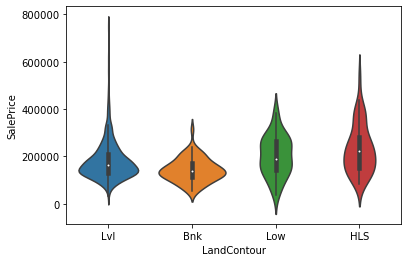

In [18]:
Contour = train.groupby('LandContour')[["SalePrice"]].mean().reset_index()

Location = pd.DataFrame({'LandContour' : [statistics.stdev(Contour['SalePrice'])]})

sns.violinplot(x = "LandContour", y = "SalePrice", data = train, split = True)

plt.show()

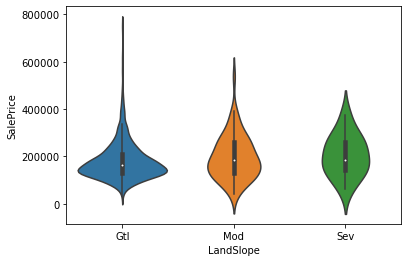

In [19]:
Slope = train.groupby('LandSlope')[["SalePrice"]].mean().reset_index()

Location["LandSlope"] = statistics.stdev(Slope['SalePrice'])

sns.violinplot(x = "LandSlope", y = "SalePrice", data = train, split = True)

plt.show()

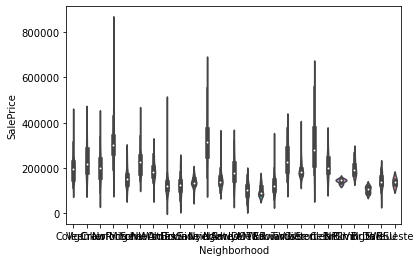

In [20]:
Neighbor = train.groupby('Neighborhood')[["SalePrice"]].mean().reset_index()

Location['Neighborhood'] = statistics.stdev(Neighbor['SalePrice'])

sns.violinplot(x = "Neighborhood", y = "SalePrice", data = train, split = True)

plt.show()

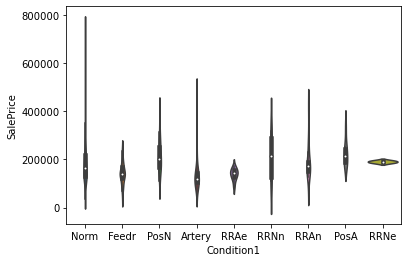

In [21]:
Cond1 = train.groupby('Condition1')[["SalePrice"]].mean().reset_index()

Location['Condition1'] = statistics.stdev(Cond1['SalePrice'])

sns.violinplot(x = "Condition1", y = "SalePrice", data = train, split = True)

plt.show()

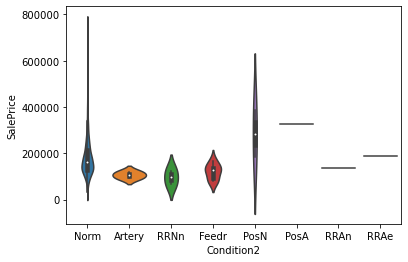

In [22]:
Cond2 = train.groupby('Condition2')[["SalePrice"]].mean().reset_index()

Location['Condition2'] = statistics.stdev(Cond2['SalePrice'])

sns.violinplot(x = "Condition2", y = "SalePrice", data = train, split = True)

plt.show()

In [23]:
Location = Location.T
Location

,0
LandContour,37446.428015
LandSlope,12492.542327
Neighborhood,66725.196972
Condition1,34809.440011
Condition2,84325.717127


The most important variables here would be Condition1, Condition2, Neighborhood, and LandContour.

### Section 2.3: Utilites

For Utilities, we will be examining Utilities, Heating, HeatingQC, CentralAir, and Electrical.

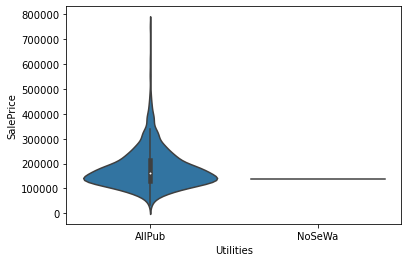

In [24]:
Util = train.groupby('Utilities')[["SalePrice"]].mean().reset_index()

Utilities = pd.DataFrame({'Utilities' : [statistics.stdev(Util['SalePrice'])]})

sns.violinplot(x = "Utilities", y = "SalePrice", data = train, split = True)

plt.show()

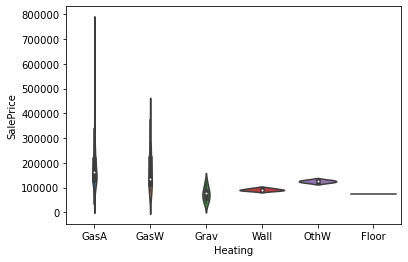

In [25]:
Heat = train.groupby('Heating')[["SalePrice"]].mean().reset_index()

Utilities['Heating'] = statistics.stdev(Heat['SalePrice'])

sns.violinplot(x = "Heating", y = "SalePrice", data = train, split = True)

plt.show()

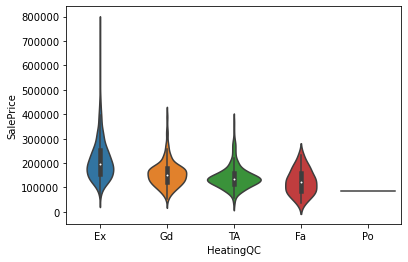

In [26]:
QC = train.groupby('HeatingQC')[["SalePrice"]].mean().reset_index()

Utilities['HeatingQC'] = statistics.stdev(QC['SalePrice'])

sns.violinplot(x = "HeatingQC", y = "SalePrice", data = train, split = True)

plt.show()

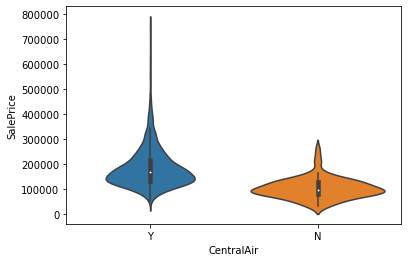

In [27]:
air = train.groupby('CentralAir')[["SalePrice"]].mean().reset_index()

Utilities['CentralAir'] = statistics.stdev(air['SalePrice'])

sns.violinplot(x = "CentralAir", y = "SalePrice", data = train, split = True)

plt.show()

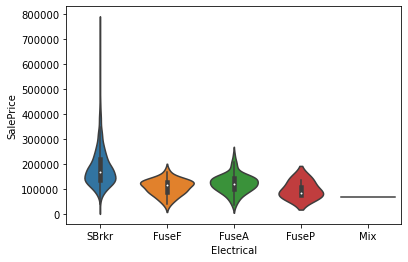

In [28]:
eletric = train.groupby("Electrical")[['SalePrice']].mean().reset_index()

Utilities['Electrical'] = statistics.stdev(eletric['SalePrice'])

sns.violinplot(x = "Electrical", y = "SalePrice", data = train, split = True)

plt.show()

In [29]:
Utilities = Utilities.T
Utilities

,0
Utilities,30724.466216
Heating,47083.101517
HeatingQC,47021.276956
CentralAir,57220.944813
Electrical,44365.325187


For the utilities, the most important variables are CentralAir, Heating, and HeatingQC.

### Section 2.4: Type

The Type variables examined will be BldgType, HouseStyle, and Functional.

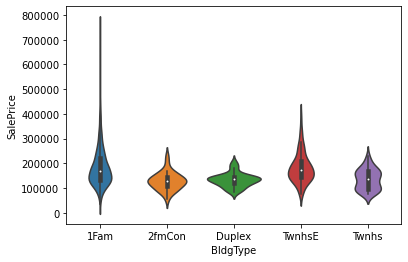

In [30]:
bldg = train.groupby("BldgType")[['SalePrice']].mean().reset_index()

Type = pd.DataFrame({'BldgType' : [statistics.stdev(bldg['SalePrice'])]})

sns.violinplot(x = "BldgType", y = "SalePrice", data = train, split = True)

plt.show()

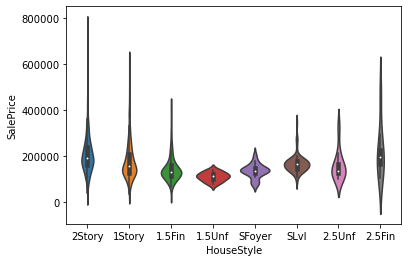

In [31]:
House = train.groupby("HouseStyle")[['SalePrice']].mean().reset_index()

Type['HouseStyle'] = statistics.stdev(House['SalePrice'])

sns.violinplot(x = "HouseStyle", y = "SalePrice", data = train, split = True)

plt.show()

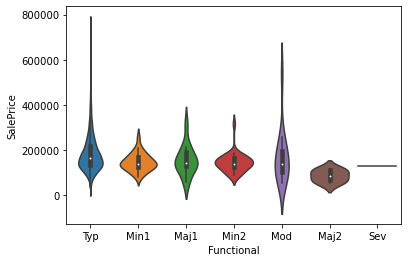

In [32]:
func = train.groupby("Functional")[['SalePrice']].mean().reset_index()

Type['Functional'] =  statistics.stdev(eletric['SalePrice'])

sns.violinplot(x = "Functional", y = "SalePrice", data = train, split = True)

plt.show()

In [33]:
Type = Type.T
Type

,0
BldgType,28223.539381
HouseStyle,37070.062958
Functional,44365.325187


The most important variable here is Functional.

### Section 2.5: Condition

For conditions, we will examine OverallQual, OverallCond, YearRemodAdd, and Foundation.

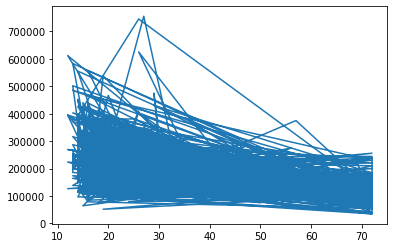

In [34]:
plt.plot(train['Age'], train['SalePrice'])

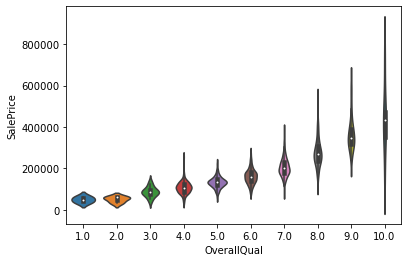

In [35]:
QualH = train.groupby("OverallQual")[['SalePrice']].mean().reset_index()

Condition = pd.DataFrame({'OverallQual' : [statistics.stdev(QualH['SalePrice'])]})

sns.violinplot(x = "OverallQual", y = "SalePrice", data = train, split = True)

plt.show()

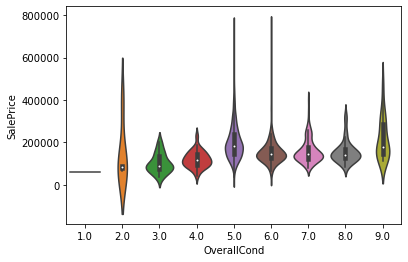

In [36]:
CondH = train.groupby("OverallCond")[['SalePrice']].mean().reset_index()

Condition['OverallCond'] = statistics.stdev(CondH['SalePrice'])

sns.violinplot(x = "OverallCond", y = "SalePrice", data = train, split = True)

plt.show()

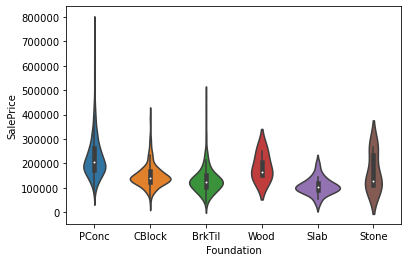

In [37]:
Found = train.groupby("Foundation")[['SalePrice']].mean().reset_index()

Condition['Foundation'] = statistics.stdev(House['SalePrice'])

sns.violinplot(x = "Foundation", y = "SalePrice", data = train, split = True)

plt.show()

In [38]:
Condition = Condition.T
Condition

,0
OverallQual,133581.054206
OverallCond,47836.763584
Foundation,37070.062958


We will be examining YearRemodAdd with the categorical variables with OverallQual standing out.

In [39]:
cond_test = smf.ols(
        formula = 'np.log(SalePrice) ~ OverallQual/Age', data = train).fit()

In [40]:
cond_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     1605.
Date:                Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:50:42   Log-Likelihood:                 118.44
No. Observations:                1460   AIC:                            -230.9
Df Residuals:                    1457   BIC:                            -215.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.7555      0.032    338.028      0.000      10.693      10.818
OverallQual         0.2276      0.004     52.735      0.000       0.219       0.236
OverallQual:Age    -0.0006   5.88e-05     -9.663      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       76.236   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.146
Skew:                          -0.356   Prob(JB):                     1.51e-33
Kurtosis:                       4.406   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$log(SalePrice) = 10.7555 + 0.2276 X OverallQual + -0.0006 x {OverallQual / Age}$

In [41]:
dg.linear_reset(cond_test, power = 2)

/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=0.45313528019986893, p-value=0.5008498080249605, df_denom=1>

### Section 2.6: Outside

The variables for Outside are RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQuad, ExterCond, PavedDrive, and Fence.

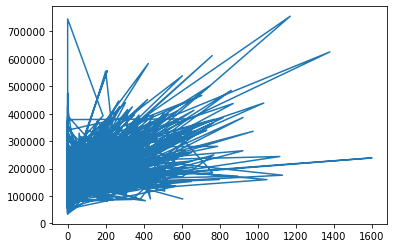

In [42]:
plt.plot(train['MasVnrArea'], train['SalePrice'])

There doesn't seem to be any relationship at all.

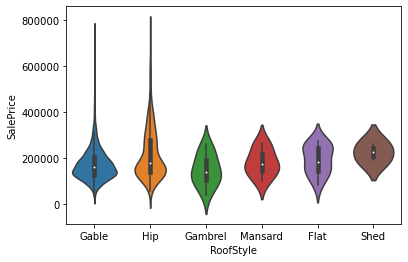

In [43]:
RStyle = train.groupby("RoofStyle")[['SalePrice']].mean().reset_index()

Outside = pd.DataFrame({"RoofStyle":[statistics.stdev(RStyle['SalePrice'])]})

sns.violinplot(x = "RoofStyle", y = "SalePrice", data = train, split = True)

plt.show()

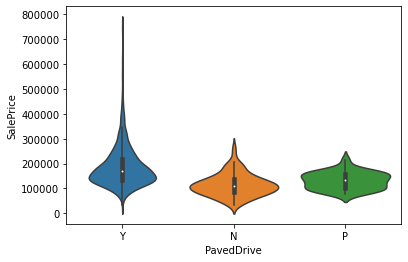

In [44]:
PavedD = train.groupby("PavedDrive")[['SalePrice']].mean().reset_index()

Outside['PavedDrive'] = [statistics.stdev(PavedD['SalePrice'])]

sns.violinplot(x = "PavedDrive", y = "SalePrice", data = train, split = True)

plt.show()

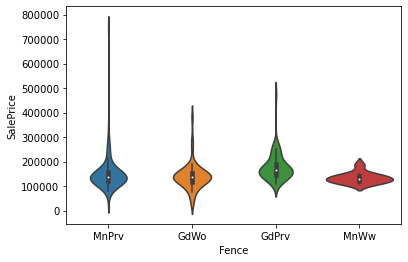

In [45]:
Fence = train.groupby("Fence")[['SalePrice']].mean().reset_index()

Outside['Fence'] = [statistics.stdev(Fence['SalePrice'])]

sns.violinplot(x = "Fence", y = "SalePrice", data = train, split = True)

plt.show()

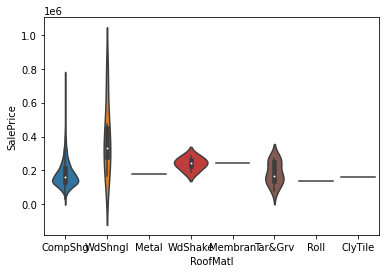

In [46]:
RMater = train.groupby("RoofMatl")[['SalePrice']].mean().reset_index()

Outside["RoofMatl"] = statistics.stdev(RMater['SalePrice'])

sns.violinplot(x = "RoofMatl", y = "SalePrice", data = train, split = True)

plt.show()

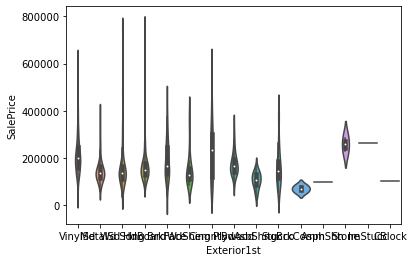

In [47]:
Ext1 = train.groupby("Exterior1st")[['SalePrice']].mean().reset_index()

Outside['Exterior1st'] = [statistics.stdev(Ext1['SalePrice'])]

sns.violinplot(x = "Exterior1st", y = "SalePrice", data = train, split = True)

plt.show()

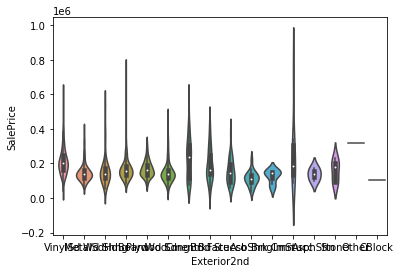

In [48]:
Ext2 = train.groupby("Exterior2nd")[['SalePrice']].mean().reset_index()

Outside['Exterior2nd'] = [statistics.stdev(Ext2['SalePrice'])]

sns.violinplot(x = "Exterior2nd", y = "SalePrice", data = train, split = True)

plt.show()

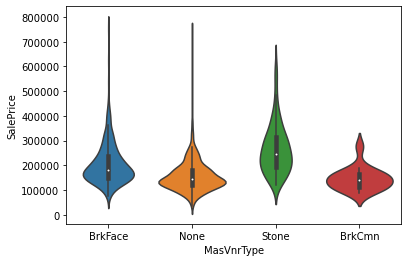

In [49]:
MasType = train.groupby("MasVnrType")[['SalePrice']].mean().reset_index()

Outside['MasVnrType'] = [statistics.stdev(MasType['SalePrice'])]

sns.violinplot(x = "MasVnrType", y = "SalePrice", data = train, split = True)

plt.show()

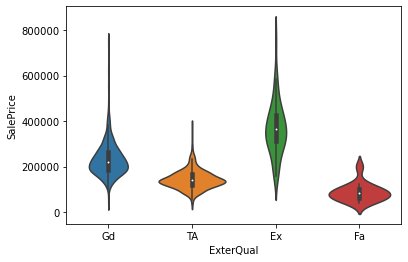

In [50]:
ExtQ = train.groupby("ExterQual")[['SalePrice']].mean().reset_index()

Outside['ExterQual'] = [statistics.stdev(ExtQ['SalePrice'])]

sns.violinplot(x = "ExterQual", y = "SalePrice", data = train, split = True)

plt.show()

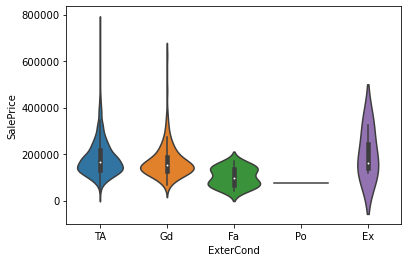

In [51]:
ExtC = train.groupby("ExterCond")[['SalePrice']].mean().reset_index()

Outside['ExterCond'] = [statistics.stdev(ExtC['SalePrice'])]

sns.violinplot(x = "ExterCond", y = "SalePrice", data = train, split = True)

plt.show()

In [52]:
Outside = Outside.T
Outside

,0
RoofStyle,28986.540167
PavedDrive,37245.669295
Fence,19802.859105
RoofMatl,79783.318754
Exterior1st,57697.237310
Exterior2nd,55551.545319
MasVnrType,54579.447999
ExterQual,121669.389152
ExterCond,54186.488613


We will be working with MasVnrArea and categorical variables. 

In [53]:
outside_test = smf.ols(
        formula = 'np.log(SalePrice) ~ MasVnrArea', data = train).fit()

In [54]:
outside_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     330.4
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           1.11e-66
Time:                        09:50:44   Log-Likelihood:                -577.99
No. Observations:                1452   AIC:                             1160.
Df Residuals:                    1450   BIC:                             1171.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9239      0.011   1093.554      0.000      11.902      11.945
MasVnrArea     0.0010   5.23e-05     18.178      0.000       0.001       0.001
==============================================================================
Omnibus:                       29.070   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.888
Skew:                          -0.133   Prob(JB):                     8.91e-12
Kurtosis:                       3.878   Cond. No.                         240.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Examining the plot, I do not believe we should create a linear regression between the masonry vaneer area and the sale price as there seems to be no correlation between those two. However, the glaring variables to me are ExterQual and RoofMatl. 

### Section 2.7: Basement

The variables we will be examining for the Basement would be BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, and BsmtUnfSF.

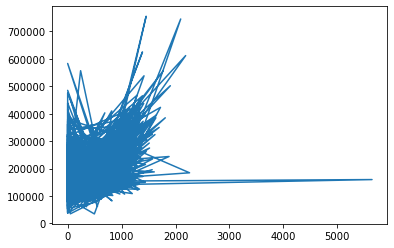

In [55]:
plt.plot(train['BsmtFinSF1'], train['SalePrice'])

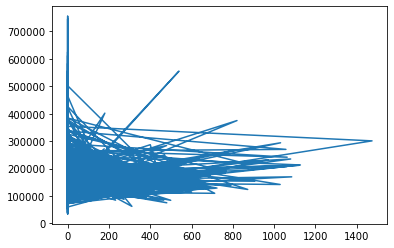

In [56]:
plt.plot(train['BsmtFinSF2'], train['SalePrice'])

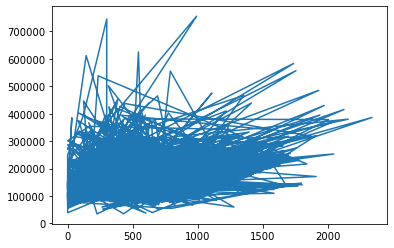

In [57]:
plt.plot(train['BsmtUnfSF'], train['SalePrice'])

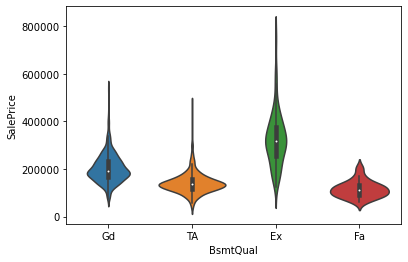

In [58]:
BsmtQ = train.groupby("BsmtQual")[['SalePrice']].mean().reset_index()

Basement = pd.DataFrame({'BsmtQual' : [statistics.stdev(BsmtQ['SalePrice'])]})

sns.violinplot(x = "BsmtQual", y = "SalePrice", data = train, split = True)

plt.show()

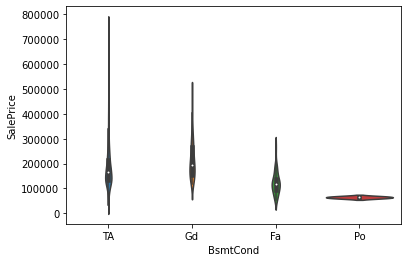

In [59]:
BsmtC = train.groupby('BsmtCond')[['SalePrice']].mean().reset_index()

Basement['BsmtCond'] = [statistics.stdev(BsmtC['SalePrice'])]

sns.violinplot(x = "BsmtCond", y = "SalePrice", data = train, split = True)

plt.show()

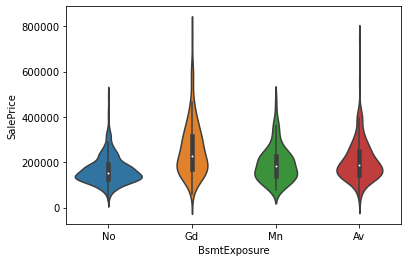

In [60]:
BsmtE = train.groupby('BsmtExposure')[['SalePrice']].mean().reset_index()

Basement['BsmtExposure'] = [statistics.stdev(BsmtE['SalePrice'])]

sns.violinplot(x = "BsmtExposure", y = "SalePrice", data = train, split = True)

plt.show()

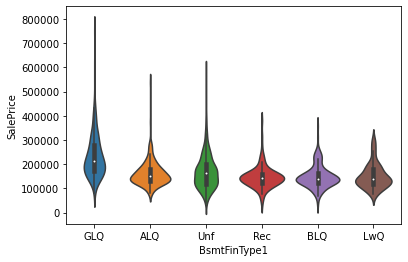

In [61]:
BsmtFinT1 = train.groupby('BsmtFinType1')[['SalePrice']].mean().reset_index()

Basement['BsmtFinType1'] = [statistics.stdev(BsmtFinT1['SalePrice'])]

sns.violinplot(x = "BsmtFinType1", y = "SalePrice", data = train, split = True)

plt.show()

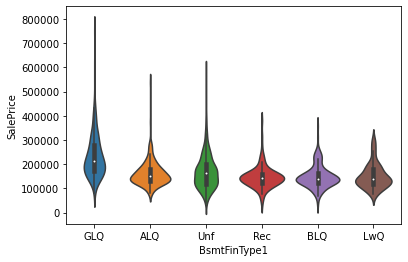

In [62]:
BsmtFinT2 = train.groupby('BsmtFinType2')[['SalePrice']].mean().reset_index()

Basement['BsmtFinType2'] = [statistics.stdev(BsmtFinT2['SalePrice'])]

sns.violinplot(x = "BsmtFinType1", y = "SalePrice", data = train, split = True)

plt.show()

In [63]:
Basement = Basement.T
Basement

,0
BsmtQual,94368.336203
BsmtCond,66570.541388
BsmtExposure,38619.189315
BsmtFinType1,33560.535661
BsmtFinType2,20643.011279


We will be use BsmtFinSF1, BsmtFinSF2, and BsmtUnfSF with the categorical variables. 

In [64]:
basement_test = smf.ols(
        formula = 'np.log(SalePrice) ~ BsmtFinSF1*BsmtQual', data = train).fit()

In [65]:
basement_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     181.7
Date:                Fri, 26 Aug 2022   Prob (F-statistic):          6.25e-192
Time:                        09:50:46   Log-Likelihood:                -236.43
No. Observations:                1423   AIC:                             488.9
Df Residuals:                    1415   BIC:                             530.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    12.5559      0.039    324.303      0.000      12.480      12.632
BsmtQual[T.Fa]               -0.9737      0.067    -14.476      0.000      -1.106      -0.842
BsmtQual[T.Gd]               -0.4433      0.042    -10.493      0.000      -0.526      -0.360
BsmtQual[T.TA]               -0.8447      0.042    -19.985      0.000      -0.928      -0.762
BsmtFinSF1                 9.882e-05   3.35e-05      2.951      0.003    3.31e-05       0.000
BsmtFinSF1:BsmtQual[T.Fa]     0.0002      0.000      0.852      0.395      -0.000       0.001
BsmtFinSF1:BsmtQual[T.Gd]  4.363e-05   4.25e-05      1.027      0.305   -3.97e-05       0.000
BsmtFinSF1:BsmtQual[T.TA]     0.0002   4.72e-05      3.443      0.001    6.99e-05       0.000
==============================================================================
Omnibus:                       81.194   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.096
Skew:                          -0.239   Prob(JB):                     2.69e-53
Kurtosis:                       4.963   Cond. No.                     8.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$log(SalePrice) = 12.5559 + -0.9737 x Fa + -0.4433 x Gd + -0.8447 x TA + 9.882e-05 x BsmtFinSF1 + 0.0002 x BsmtFinSF1 x Fa + 4.363e-05 x BsmtFinSF1 x Gd + 0.0002 x BsmtFinSF1 x TA$

In [66]:
dg.linear_reset(basement_test, power = 2)

/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=0.23680270833266445, p-value=0.626524964688898, df_denom=1>

### Section 2.8: Size

To examine size, the variables would be FirFlrSF, SecFlrSF, LowQualFinSF, and GrLivArea.

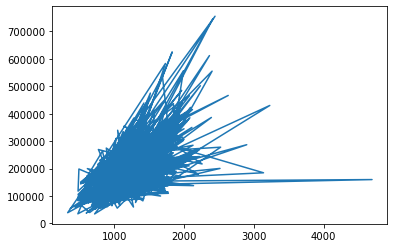

In [67]:
plt.plot(train['FirFlrSF'], train['SalePrice'])

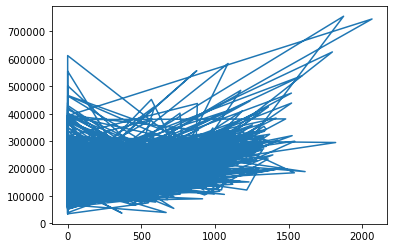

In [68]:
plt.plot(train['SecFlrSF'], train['SalePrice'])

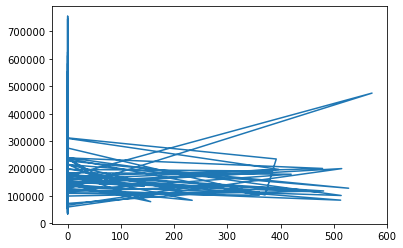

In [69]:
plt.plot(train['LowQualFinSF'], train['SalePrice'])

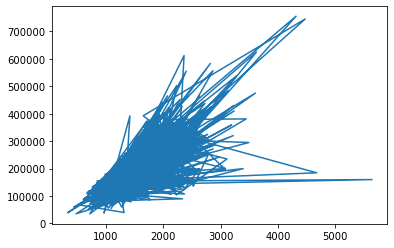

In [70]:
plt.plot(train['GrLivArea'], train['SalePrice'])

Since it is all numeric variables, we will be examining FirFlrSF, SecFlrSF, LowQualFinSF, and GrLivArea and see if there are any interactions. 

Because the GrLivArea and FirFlrSF have such similiar graphs, I want to test these two together in the same linear regression to see if we can predict a better model.

In [71]:
size_test = smf.ols(
        formula = 'np.log(SalePrice) ~ FirFlrSF*GrLivArea', data = train).fit()

In [72]:
size_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     768.1
Date:                Fri, 26 Aug 2022   Prob (F-statistic):          2.53e-299
Time:                        09:50:47   Log-Likelihood:                -38.750
No. Observations:                1460   AIC:                             85.50
Df Residuals:                    1456   BIC:                             106.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.5064      0.042    248.106      0.000      10.423      10.589
FirFlrSF               0.0007   3.53e-05     21.124      0.000       0.001       0.001
GrLivArea              0.0007   2.51e-05     28.435      0.000       0.001       0.001
FirFlrSF:GrLivArea -2.303e-07    1.5e-08    -15.329      0.000    -2.6e-07   -2.01e-07
==============================================================================
Omnibus:                      186.847   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.423
Skew:                          -0.881   Prob(JB):                     1.92e-64
Kurtosis:                       4.312   Cond. No.                     1.50e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$log(SalePrice) = 10.5064 + 0.0007 x FirFlrSF + 0.0007 x GrLivArea + -2.303e-07 x FirFlrSF x GrLivArea$

In [73]:
dg.linear_reset(size_test, power = 2)

/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=0.38079931449925336, p-value=0.5371757669403363, df_denom=1>

### Section 2.9: Bathrooms

The variables for bathrooms are BsmtFullBath, BsmtHalfBath, FullBath, and HalfBath

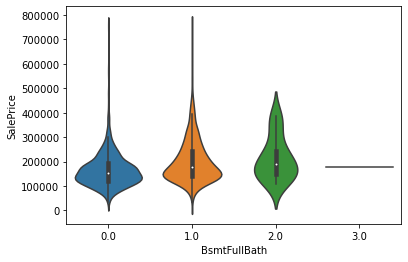

In [74]:
BsmtFB = train.groupby('BsmtFullBath')[['SalePrice']].mean().reset_index()

Bathrooms = pd.DataFrame({'BsmtFullBath' : [statistics.stdev(BsmtFB['SalePrice'])]})

sns.violinplot(x = "BsmtFullBath", y = "SalePrice", data = train, split = True)

plt.show()

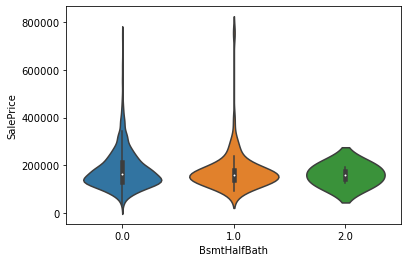

In [75]:
BsmtHB = train.groupby('BsmtHalfBath')[['SalePrice']].mean().reset_index()

Bathrooms['BsmtHalfBath'] = [statistics.stdev(BsmtHB['SalePrice'])]

sns.violinplot(x = "BsmtHalfBath", y = "SalePrice", data = train, split = True)

plt.show()

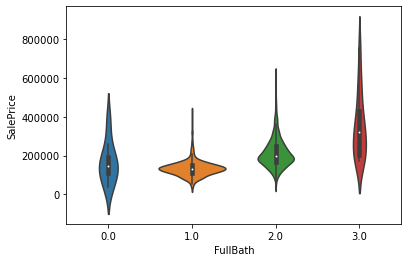

In [76]:
FullB = train.groupby('FullBath')[['SalePrice']].mean().reset_index()

Bathrooms['FullBath'] = [statistics.stdev(FullB['SalePrice'])]

sns.violinplot(x = "FullBath", y = "SalePrice", data = train, split = True)

plt.show()

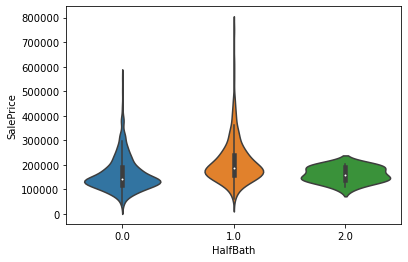

In [77]:
HalfB = train.groupby('HalfBath')[['SalePrice']].mean().reset_index()

Bathrooms['HalfBath'] = [statistics.stdev(HalfB['SalePrice'])]

sns.violinplot(x = "HalfBath", y = "SalePrice", data = train, split = True)

plt.show()

In [78]:
Bathrooms = Bathrooms.T
Bathrooms

,0
BsmtFullBath,21671.146192
BsmtHalfBath,10600.055635
FullBath,94101.921238
HalfBath,29122.681009


The variables that stand out the most are FullBath and HalfBath.

### Section 2.10: Rooms

The variables for Rooms are BedroomAbvGr and TotRmsAbvGr.

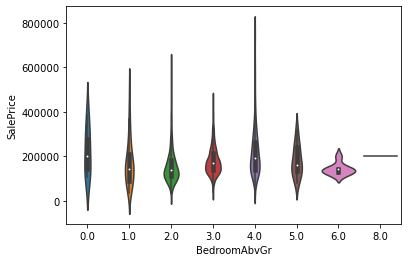

In [79]:
BedR = train.groupby('BedroomAbvGr')[['SalePrice']].mean().reset_index()

Rooms = pd.DataFrame({'BedroomAbvGr' : [statistics.stdev(BedR['SalePrice'])]})

sns.violinplot(x = "BedroomAbvGr", y = "SalePrice", data = train, split = True)

plt.show()

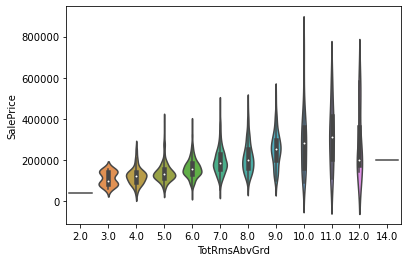

In [80]:
TotR = train.groupby('TotRmsAbvGrd')[['SalePrice']].mean().reset_index()

Rooms['TotRmsAbvGrd'] = [statistics.stdev(TotR['SalePrice'])]

sns.violinplot(x = "TotRmsAbvGrd", y = "SalePrice", data = train, split = True)

plt.show()

In [81]:
Rooms = Rooms.T
Rooms

,0
BedroomAbvGr,27779.659544
TotRmsAbvGrd,83650.332177


The variable that stands out the most is TotRmsAbvGrd.

### Section 2.11: Kitchen

For the variables in Kitchem are Kitchen and KitchenQual.

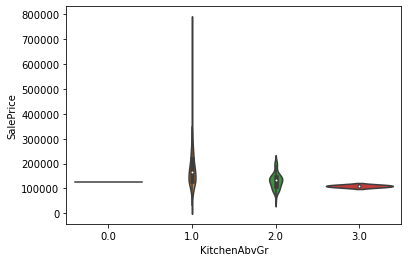

In [82]:
Kits = train.groupby('KitchenAbvGr')[['SalePrice']].mean().reset_index()

Kitchen = pd.DataFrame({'KitchenAbvGr' : [statistics.stdev(Kits['SalePrice'])]})

sns.violinplot(x = "KitchenAbvGr", y = "SalePrice", data = train, split = True)

plt.show()

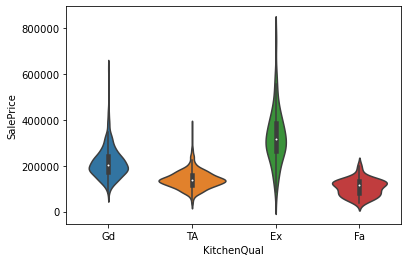

In [83]:
KitQ = train.groupby('KitchenQual')[['SalePrice']].mean().reset_index()

Kitchen['KitchenQual'] = [statistics.stdev(KitQ['SalePrice'])]

sns.violinplot(x = "KitchenQual", y = "SalePrice", data = train, split = True)

plt.show()

In [84]:
Kitchen = Kitchen.T
Kitchen

,0
KitchenAbvGr,31781.750789
KitchenQual,98569.621328


The variable that stands out the most is KitchenQual.

### Section 2.12: Fireplaces 

The variables for Fireplaces are Fireplaces and FireplaceQu

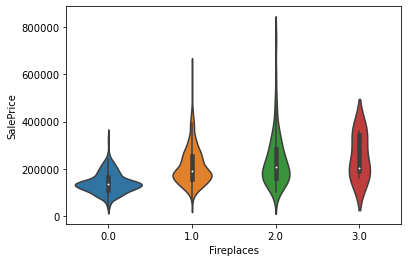

In [85]:
Fire = train.groupby('Fireplaces')[['SalePrice']].mean().reset_index()

Fireplaces = pd.DataFrame({'Fireplaces' : [statistics.stdev(Fire['SalePrice'])]})

sns.violinplot(x = "Fireplaces", y = "SalePrice", data = train, split = True)

plt.show()

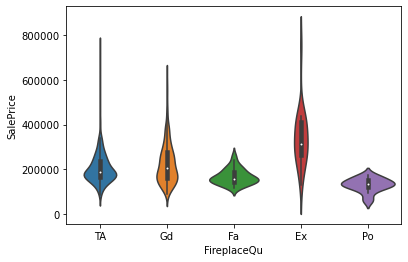

In [86]:
FireQ = train.groupby('FireplaceQu')[['SalePrice']].mean().reset_index()

Fireplaces['FireplaceQu'] = statistics.stdev(FireQ['SalePrice'])

sns.violinplot(x = "FireplaceQu", y = "SalePrice", data = train, split = True)

plt.show()

In [87]:
Fireplaces = Fireplaces.T
Fireplaces

,0
Fireplaces,49699.491222
FireplaceQu,78740.977670


FireplaceQu is the variable that stands out.

### Section 2.13: Pool

The variables for Pool are PoolArea and PoolQc.

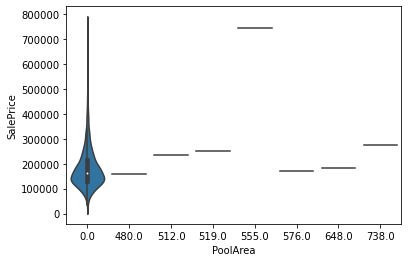

In [88]:
PoolA = train.groupby('PoolArea')[['SalePrice']].mean().reset_index()

Pool = pd.DataFrame({'PoolArea' : [statistics.stdev(PoolA['SalePrice'])]})

sns.violinplot(x = "PoolArea", y = "SalePrice", data = train, split = True)

plt.show()

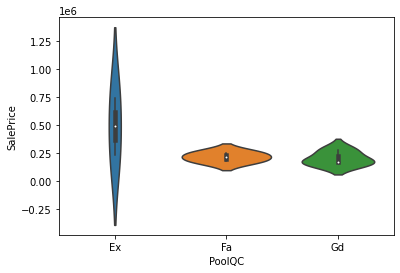

In [89]:
PoolQ = train.groupby('PoolQC')[['SalePrice']].mean().reset_index()

Pool['PoolQC'] = statistics.stdev(PoolQ['SalePrice'])

sns.violinplot(x = 'PoolQC', y = 'SalePrice', data = train, split = True)

plt.show()

In [90]:
Pool = Pool.T
Pool

,0
PoolArea,194550.550554
PoolQC,162523.090770


Both PoolArea and PoolQc stand out.

### Section 2.14: Porch

The variables for Porch are WoodDeckSF, OpenPorchSF, EnclosedPorchSF, SsnPorch, and ScreenPorch.

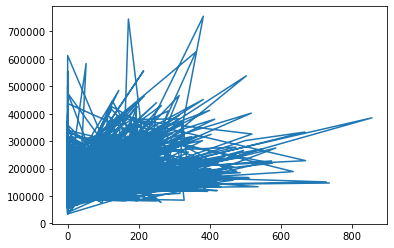

In [91]:
plt.plot(train['WoodDeckSF'], train['SalePrice'])

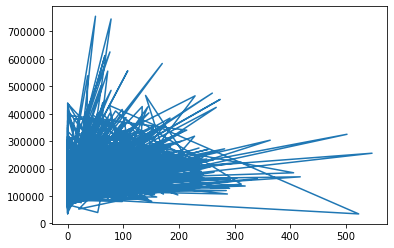

In [92]:
plt.plot(train['OpenPorchSF'], train['SalePrice'])

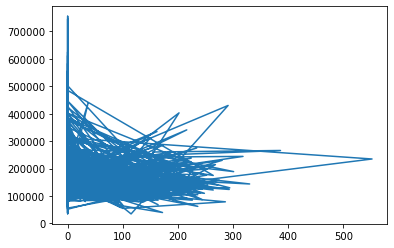

In [93]:
plt.plot(train['EnclosedPorch'], train['SalePrice'])

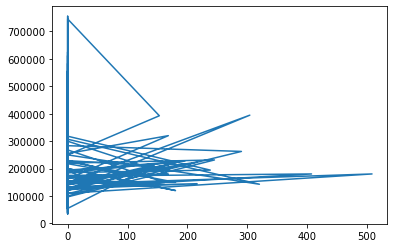

In [94]:
plt.plot(train['SsnPorch'], train['SalePrice'])

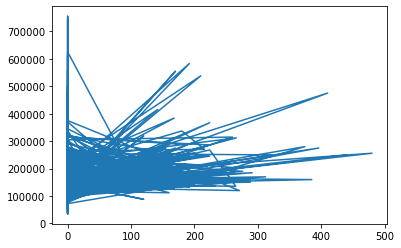

In [95]:
plt.plot(train['ScreenPorch'], train['SalePrice'])

Since we are using numeric variables, we will be studying WoodDeckSF, OpenPorchSF, EnclosedPorch, SsnPorch, and ScreenPorch and their interactions.

In [96]:
porchtst1 = smf.ols(
        formula = 'np.log(SalePrice) ~ WoodDeckSF', data = train).fit()

In [97]:
porchtst1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     183.2
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           2.06e-39
Time:                        09:50:51   Log-Likelihood:                -644.94
No. Observations:                1460   AIC:                             1294.
Df Residuals:                    1458   BIC:                             1304.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9237      0.012    966.756      0.000      11.899      11.948
WoodDeckSF     0.0011   7.87e-05     13.537      0.000       0.001       0.001
==============================================================================
Omnibus:                       22.511   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.979
Skew:                           0.087   Prob(JB):                     5.66e-09
Kurtosis:                       3.771   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
porchtst2 = smf.ols(
        formula = 'np.log(SalePrice) ~ OpenPorchSF', data = train).fit()

In [99]:
porchtst2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     167.6
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           2.34e-36
Time:                        09:50:51   Log-Likelihood:                -651.95
No. Observations:                1460   AIC:                             1308.
Df Residuals:                    1458   BIC:                             1318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.9337      0.012    985.037      0.000      11.910      11.957
OpenPorchSF     0.0019      0.000     12.944      0.000       0.002       0.002
==============================================================================
Omnibus:                       71.541   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.835
Skew:                          -0.085   Prob(JB):                     2.26e-52
Kurtosis:                       4.970   Cond. No.                         99.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
porchtst3 = smf.ols(
        formula = 'np.log(SalePrice) ~ EnclosedPorch', data = train).fit()

In [101]:
porchtst3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     33.13
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           1.05e-08
Time:                        09:50:51   Log-Likelihood:                -714.96
No. Observations:                1460   AIC:                             1434.
Df Residuals:                    1458   BIC:                             1444.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.0454      0.011   1096.214      0.000      12.024      12.067
EnclosedPorch    -0.0010      0.000     -5.756      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       28.097   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.398
Skew:                           0.141   Prob(JB):                     5.10e-11
Kurtosis:                       3.837   Cond. No.                         69.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
porchtst4 = smf.ols(
        formula = 'np.log(SalePrice) ~ SsnPorch', data = train).fit()

In [103]:
porchtst4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.408
Date:                Fri, 26 Aug 2022   Prob (F-statistic):             0.0359
Time:                        09:50:51   Log-Likelihood:                -729.16
No. Observations:                1460   AIC:                             1462.
Df Residuals:                    1458   BIC:                             1473.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0215      0.011   1143.557      0.000      12.001      12.042
SsnPorch       0.0007      0.000      2.099      0.036    4.91e-05       0.001
==============================================================================
Omnibus:                       26.180   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.823
Skew:                           0.128   Prob(JB):                     3.05e-10
Kurtosis:                       3.809   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
porchtst5 = smf.ols(
        formula = 'np.log(SalePrice) ~ ScreenPorch', data = train).fit()

In [105]:
porchtst5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     21.74
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           3.41e-06
Time:                        09:50:51   Log-Likelihood:                -720.56
No. Observations:                1460   AIC:                             1445.
Df Residuals:                    1458   BIC:                             1456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.0110      0.011   1116.999      0.000      11.990      12.032
ScreenPorch     0.0009      0.000      4.663      0.000       0.001       0.001
==============================================================================
Omnibus:                       26.007   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.089
Skew:                           0.142   Prob(JB):                     7.25e-10
Kurtosis:                       3.782   Cond. No.                         59.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since they all have very low R-Squared values, we can assume that Porch does not have any large impact on house prices.

### Section 2.15: Features

The variables for Features are MiscFeature and MiscValue.

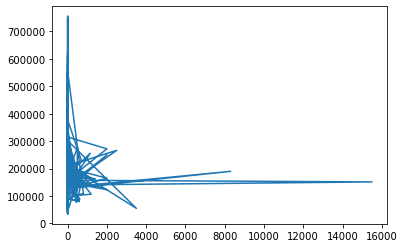

In [106]:
plt.plot(train['MiscVal'], train['SalePrice'])

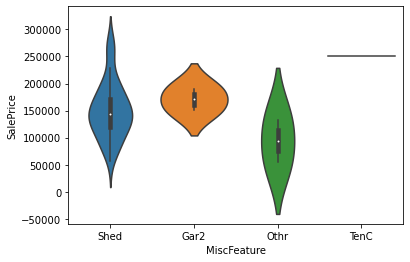

In [107]:
MiscF = train.groupby('MiscFeature')[['SalePrice']].mean().reset_index()

Features = pd.DataFrame({'MiscFeature' : [statistics.stdev(MiscF['SalePrice'])]})

sns.violinplot(x = 'MiscFeature', y = 'SalePrice', data = train, split = True)

plt.show()

In [108]:
Features = Features.T
Features

,0
MiscFeature,64500.725437


In [109]:
featuretest = smf.ols(
        formula = 'SalePrice ~ np.reciprocal(MiscVal + 0.001)', data = train).fit()

In [110]:
featuretest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     6.848
Date:                Fri, 26 Aug 2022   Prob (F-statistic):            0.00896
Time:                        09:50:51   Log-Likelihood:                -18541.
No. Observations:                1460   AIC:                         3.709e+04
Df Residuals:                    1458   BIC:                         3.710e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1.527e+05    1.1e+04     13.885      0.000    1.31e+05    1.74e+05
np.reciprocal(MiscVal + 0.001)    29.2985     11.196      2.617      0.009       7.337      51.260
==============================================================================
Omnibus:                      608.776   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3420.503
Skew:                           1.874   Prob(JB):                         0.00
Kurtosis:                       9.494   Cond. No.                     5.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since the R-Squared is super low, we can forget about the features, they are not important. 

## Section 3: Putting it all together

In [111]:
full_tst = smf.ols(
        formula = 'np.log(SalePrice) ~ GarageCars + OverallQual/Age + BsmtFinSF1 + BsmtQual + FirFlrSF*GrLivArea + KitchenAbvGr*KitchenQual + CentralAir + Fireplaces', data = train).fit()




In [112]:
full_tst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     534.6
Date:                Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:50:52   Log-Likelihood:                 773.80
No. Observations:                1423   AIC:                            -1510.
Df Residuals:                    1404   BIC:                            -1410.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          9.2384      0.052    176.519      0.000       9.136       9.341
BsmtQual[T.Fa]                    -0.1585      0.032     -5.018      0.000      -0.220      -0.097
BsmtQual[T.Gd]                    -0.0562      0.017     -3.278      0.001      -0.090      -0.023
BsmtQual[T.TA]                    -0.0959      0.020     -4.786      0.000      -0.135      -0.057
KitchenQual[T.Fa]                  1.0587      0.080     13.281      0.000       0.902       1.215
KitchenQual[T.Gd]                  1.4654      0.081     18.168      0.000       1.307       1.624
KitchenQual[T.TA]                  1.3036      0.040     32.731      0.000       1.225       1.382
CentralAir[T.Y]                    0.1604      0.018      8.979      0.000       0.125       0.195
GarageCars                         0.0665      0.007      9.538      0.000       0.053       0.080
OverallQual                        0.0848      0.005     16.619      0.000       0.075       0.095
OverallQual:Age                   -0.0003   4.72e-05     -7.395      0.000      -0.000      -0.000
BsmtFinSF1                         0.0001   9.87e-06     11.967      0.000    9.88e-05       0.000
FirFlrSF                           0.0004   2.23e-05     18.936      0.000       0.000       0.000
GrLivArea                          0.0005   1.76e-05     26.877      0.000       0.000       0.001
FirFlrSF:GrLivArea             -1.819e-07   9.39e-09    -19.375      0.000      -2e-07   -1.63e-07
KitchenAbvGr                       1.2905      0.036     35.518      0.000       1.219       1.362
KitchenAbvGr:KitchenQual[T.Fa]    -1.1867      0.069    -17.117      0.000      -1.323      -1.051
KitchenAbvGr:KitchenQual[T.Gd]    -1.5295      0.081    -18.939      0.000      -1.688      -1.371
KitchenAbvGr:KitchenQual[T.TA]    -1.4040      0.039    -36.341      0.000      -1.480      -1.328
Fireplaces                         0.0365      0.007      5.168      0.000       0.023       0.050
==============================================================================
Omnibus:                      280.636   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1180.050
Skew:                          -0.884   Prob(JB):                    5.70e-257
Kurtosis:                       7.096   Cond. No.                     1.14e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.94e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

$$ 
log(SalePrice) = 
9.2384 + 
(0.0665 \times GarageCars \times) + 
(0.0848 \times OverallQual) + 
(-0.0003 \times OverallQual \times Age) + 
(0.0001 \times BsmtFinSF1) + 
\\
(0.0004 \times FirFlrSF) + 
(0.0005 \times GrLivArea) + 
(-1.819e-07 \times FirFlrSF \times GrLivArea) + 
(1.2905 \times KitchenAbvGr) + 
\\
(0.0365 \times Fireplaces) +
CentralAir(a) = \left\{
    \begin{array}\\
        0.1604 & \mbox{if} \ a = Y\\
    \end{array}
\right. + 
BsmtQual(b) = \left\{
    \begin{array}\\
        -0.1585 & \mbox{if} \ b = Fa\\
        -0.0562 & \mbox{if} \ b = Gd\\
        -0.0959 & \mbox{if} \ b = Ta\\
    \end{array} 
\right. + \\
KitchenQual(c) = \left\{
    \begin{array}\\
        1.0587 & \mbox{if} \ c = Fa\\
        1.4654 & \mbox{if} \ c = Gd\\
        1.3036 & \mbox{if} \ c = Ta\\
    \end{array}
\right. + 
KitchenAbvGr x KitchenQual(d) = \left\{
                    \begin{array}\\
                        -1.1867 & \mbox{if} \ d = Fa\\
                        -1.5295 & \mbox{if} \ d = Gd\\
                        -1.4040 & \mbox{if} \ d = Ta\\
                    \end{array}
                \right.
$$

In [113]:
dg.linear_reset(full_tst, power = 3)

/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=47.50097053080685, p-value=4.8450170165824134e-11, df_denom=2>

## Section 4: Testing the equation 

In [114]:
test = pd.read_csv('test.csv')

In [115]:
test.rename(columns = {'1stFlrSF' : 'FirFlrSF', '2ndFlrSF' : 'SecFlrSF', '3SsnPorch' : 'SsnPorch'}, inplace = True)

In [116]:
test['Age'] = 2022 - test['YearRemodAdd']

In [117]:
test = test.astype({'GarageCars' : float, 'OverallQual' : float, 'Age' : float, 'BsmtFinSF1' : float, 
             'FirFlrSF' : float, 'GrLivArea' : float, 'KitchenAbvGr' : float, 'Fireplaces' : float,
             'CentralAir' : str, 'BsmtQual' : str, 'KitchenQual' : str})

In [118]:
test['GarageCars'].median()
test['GarageCars'] = test['GarageCars'].fillna(2.0)

In [119]:
test['OverallQual'].median()
test['OverallQual'] = test['OverallQual'].fillna(6.0)

In [120]:
test['Age'].mean()
test['Age'] = test['Age'].fillna(30.0)

In [121]:
test['BsmtFinSF1'].describe()
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(439)

In [122]:
test['FirFlrSF'].describe()
test['FirFlrSF'] = test['FirFlrSF'].fillna(1156.50)

In [123]:
test['GrLivArea'].describe()
test['GrLivArea'] = test['GrLivArea'].fillna(1486.0)

In [124]:
test['KitchenAbvGr'].describe()
test['KitchenAbvGr'] = test['KitchenAbvGr'].fillna(1.0)

In [125]:
test['Fireplaces'].describe()
test['Fireplaces'] = test['Fireplaces'].fillna(0)

In [126]:
test['CentralAir'].describe()
test['CentralAir'] = test['CentralAir'].fillna('Y')

In [127]:
test['BsmtQual'].describe()
test['BsmtQual'] = test['BsmtQual'].fillna('TA')

In [128]:
test['KitchenQual'].describe()
test['KitchenQual'] = test['KitchenQual'].fillna('TA')

In [129]:
def CAC(x):
    y = []
    for i in range(0, len(x)):
        if x[i] == 'Y':
            a = 0.1604
        else:
            a = 0
        y.append(float(a))
    return(y)

In [130]:
test['CAC'] = CAC(test['CentralAir'])

In [131]:
def BQ(x):
    y = []
    for i in range(0, len(x)):
        if x[i] == 'Fa':
            b = -0.1585
        elif x[i] == 'Gd':
            b = -0.0562
        elif x[i] == 'TA':
            b = -0.0959
        else:
            b = 0
        y.append(float(b))
    return(y)

In [132]:
test['BQ'] = BQ(test['BsmtQual'])

In [133]:
def KQ1(x):
    y = []
    for i in range(0, len(x)):
        if x[i] == 'Fa':
            c = 1.0587
        elif x[i] == 'Gd':
            c = 1.4654
        elif x[i] == 'TA':
            c = 1.3036
        else:
            c = 0
        y.append(float(c))
    return(y)

In [134]:
test['KQ1'] = KQ1(test['KitchenQual'])

In [135]:
def KQ2(x):
    y = []
    for i in range(0, len(x)):
        if x[i] == 'Fa':
            d = -1.1867
        elif x[i] == 'Gd':
            d = -1.5295
        elif x[i] == 'TA':
            d = -1.4040
        else:
            d = 0
        y.append(float(d))
    return(y)

In [136]:
test['KQ2'] = KQ2(test['KitchenQual'])

In [137]:
test['x_value'] = (9.2384 + (0.0665 * test['GarageCars']) + (0.0848 * test['OverallQual']) + (-0.0003 * test['OverallQual'] * test['Age']) + 
(0.0001 * test['BsmtFinSF1']) + (0.0004 * test['FirFlrSF']) + (0.0005 * test['GrLivArea']) + 
(-0.0000001819 * test['FirFlrSF'] * test['GrLivArea']) + (1.2905 * test['KitchenAbvGr']) + (0.0365 * test['Fireplaces']) + 
test['CAC'] + test['BQ'] + test['KQ1'] + (test['KitchenAbvGr'] * test['KQ2']))


In [138]:
def exp(x):
    y = []
    for i in range(0, len(x)):
        z = math.exp(float(x[i]))
        y.append(float(round(z)))
    return(y)

In [139]:
test['SalePrice'] = exp(test['x_value'])

In [140]:
submission = pd.DataFrame({'Id' : test['Id'], 'SalePrice' : test['SalePrice']})

In [141]:
submission.to_csv('submission.csv', index = False, header=True)

In [142]:
GarageCars = float(input('Number of Cars: '))
OverallQual = float(input('Overall Quality: '))
Age = float(input('Age of House: '))
BsmtFinSF1 = float(input('Input Type 1 Finished Area: '))
FirFlrSF = float(input('Input First Floor Area: '))
GrLivArea = float(input('General Living Area: '))
KitchenAbvGr = float(input('Kitchens above grade: '))
Fireplaces = float(input('Number of fireplaces: '))
CentralAir = input('Central Air condition: ')
if CentralAir == 'Y':
    a = 0.1604
else:
    a = 0 
BsmtQual = input('Basement Quality: ')
if BsmtQual == 'Fa':
    b = -0.1585
elif BsmtQual == 'Gd':
    b = -0.0562
elif BsmtQual == 'TA':
    b = -0.0959
else:
    b = 0
KitchenQual = input('Kitchen Quality: ')
if KitchenQual == 'Fa':
    c = 1.0587
elif KitchenQual == 'Gd':
    c = 1.4654
elif KitchenQual == 'TA':
    c = 1.3036
else:
    c = 0 
if KitchenQual == 'Fa':
    d = -1.1867
elif KitchenQual == 'Gd':
    d = -1.5295
elif KitchenQual == 'TA':
    d = -1.4040
else:
    d = 0

Number of Cars: 2
Overall Quality: 6
Age of House: 33
Input Type 1 Finished Area: 800
Input First Floor Area: 10000
General Living Area: 10000
Kitchens above grade: 1
Number of fireplaces: 1
Central Air condition: Y
Basement Quality: Gr
Kitchen Quality: Gr


In [143]:
print('Predicted House price equals ', round(math.exp(9.2384 + 0.0665 * GarageCars + 0.0848 * OverallQual + -0.0003 * OverallQual * Age + 0.0001 * BsmtFinSF1 + 0.0004 * FirFlrSF + 0.0005 * GrLivArea + -0.0000001819 * FirFlrSF * GrLivArea + 1.2905 * KitchenAbvGr + 0.0365 * Fireplaces + a + b + c + KitchenAbvGr * d)))



Predicted House price equals  9
